In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
customer_info_path = 'CustomerInformation.csv'
loan_info_path = 'LoanInformation.csv'


In [3]:
customer_data = pd.read_csv(customer_info_path, usecols=['CustomerID', 'Gender'])
loan_data = pd.read_csv(loan_info_path, usecols=['CustomerID','LoanID', 'Education', 'Applicant_income', 'Coapplicant_income', 'LoanAmount', 'LoanTerm','Dependents','LoanStatus'])


In [4]:
"""Understanding the Data"""
combined_data = pd.merge(customer_data, loan_data, on='CustomerID')
train=combined_data.copy()

In [5]:
train.head()

,CustomerID,Gender,LoanID,Dependents,Education,LoanAmount,LoanTerm,LoanStatus,Applicant_income,Coapplicant_income
0,1001,Female,146212,4,Not Graduate,127483.90,15 years,rejected,55764.62,8289.26
1,1002,Male,74753,4,Graduate,165953.19,5 years,approved,15233.50,18348.38
2,1002,Male,108684,2,Graduate,123727.01,15 years,rejected,29829.29,10398.44
3,1002,Male,142758,0,Graduate,296676.55,30 years,rejected,10389.87,30768.43
4,1005,Female,161537,4,Graduate,156477.16,30 years,pending,59988.38,39052.13


In [6]:
test = train[train['LoanStatus'] == 'pending'].copy()

In [7]:
test.to_csv('pending_loans_test.csv', index=False)
test.head()

,CustomerID,Gender,LoanID,Dependents,Education,LoanAmount,LoanTerm,LoanStatus,Applicant_income,Coapplicant_income
4,1005,Female,161537,4,Graduate,156477.16,30 years,pending,59988.38,39052.13
6,1008,Female,76484,2,Not Graduate,332827.71,15 years,pending,23118.29,3290.33
15,1016,Female,142571,4,Not Graduate,454805.85,15 years,pending,15853.44,8430.25
16,1019,Male,185963,1,Graduate,71241.31,10 years,pending,80977.86,36388.69
17,1020,Female,171935,4,Graduate,66508.60,15 years,pending,42367.22,34709.06


In [8]:
test_original=test.copy()

In [9]:
test.columns

Index(['CustomerID', 'Gender', 'LoanID', 'Dependents', 'Education',
       'LoanAmount', 'LoanTerm', 'LoanStatus', 'Applicant_income',
       'Coapplicant_income'],
      dtype='object')

In [10]:
test.shape

(66378, 10)

In [11]:
train = train[train['LoanStatus'] != 'pending']
train.to_csv('modified_train.csv', index=False)
train.head()

,CustomerID,Gender,LoanID,Dependents,Education,LoanAmount,LoanTerm,LoanStatus,Applicant_income,Coapplicant_income
0,1001,Female,146212,4,Not Graduate,127483.90,15 years,rejected,55764.62,8289.26
1,1002,Male,74753,4,Graduate,165953.19,5 years,approved,15233.50,18348.38
2,1002,Male,108684,2,Graduate,123727.01,15 years,rejected,29829.29,10398.44
3,1002,Male,142758,0,Graduate,296676.55,30 years,rejected,10389.87,30768.43
5,1006,Female,135000,0,Not Graduate,73687.04,15 years,rejected,81317.13,25607.82


In [12]:
train.dtypes

CustomerID              int64
Gender                 object
LoanID                  int64
Dependents              int64
Education              object
LoanAmount            float64
LoanTerm               object
LoanStatus             object
Applicant_income      float64
Coapplicant_income    float64
dtype: object

In [13]:
train.shape

(132570, 10)

In [14]:
train['LoanStatus'].value_counts()

LoanStatus
approved    66299
rejected    66271
Name: count, dtype: int64

In [15]:
train['LoanStatus'].value_counts(normalize=True)

LoanStatus
approved    0.500106
rejected    0.499894
Name: proportion, dtype: float64

<Axes: xlabel='LoanStatus'>

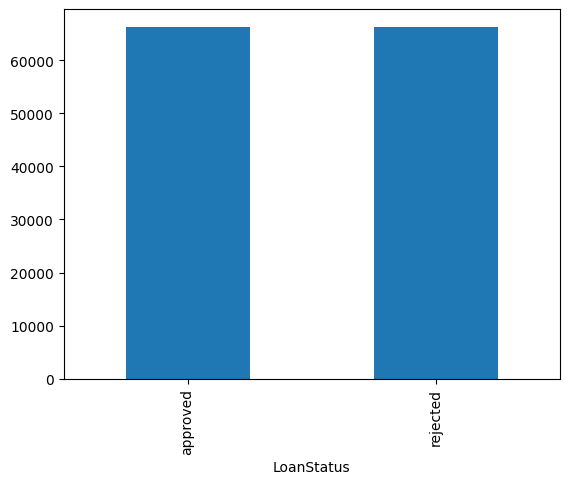

In [16]:
train['LoanStatus'].value_counts().plot.bar()

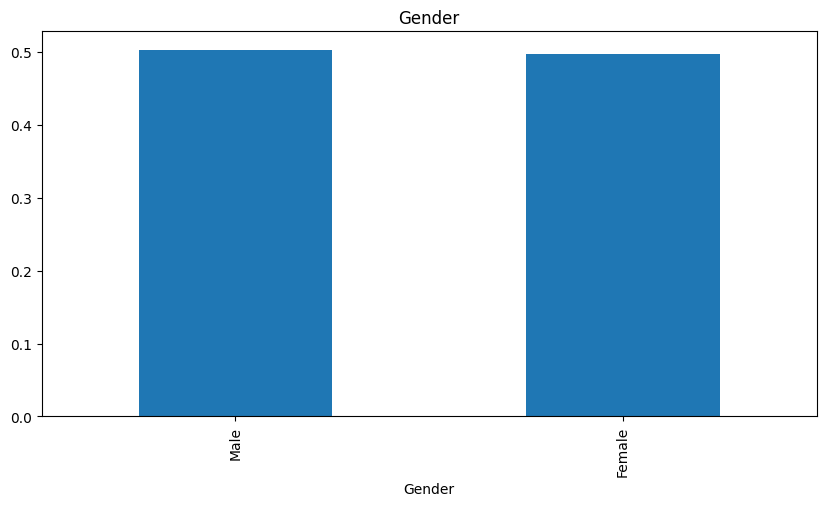

In [17]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Gender')
plt.show()

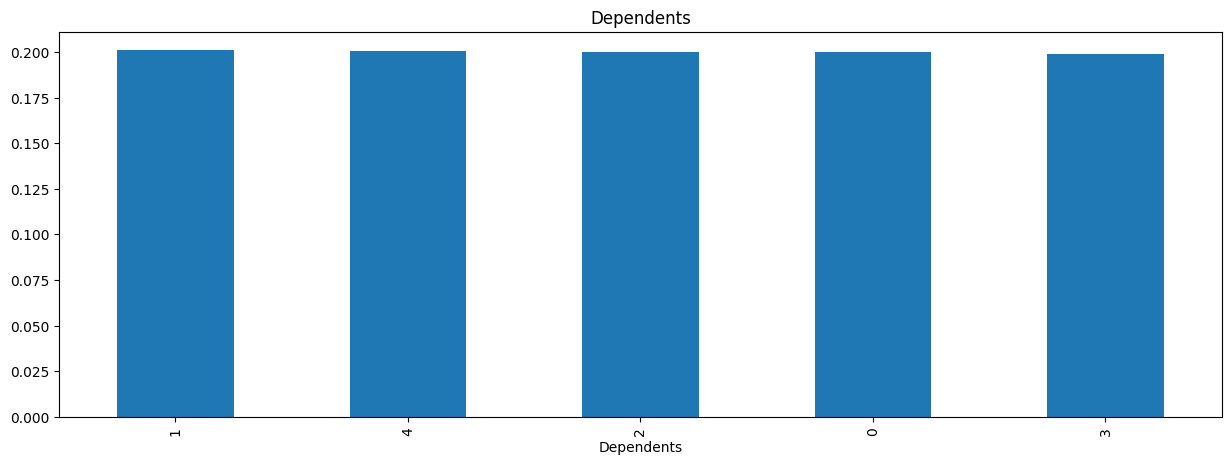

In [18]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,5), title='Dependents')
plt.show()

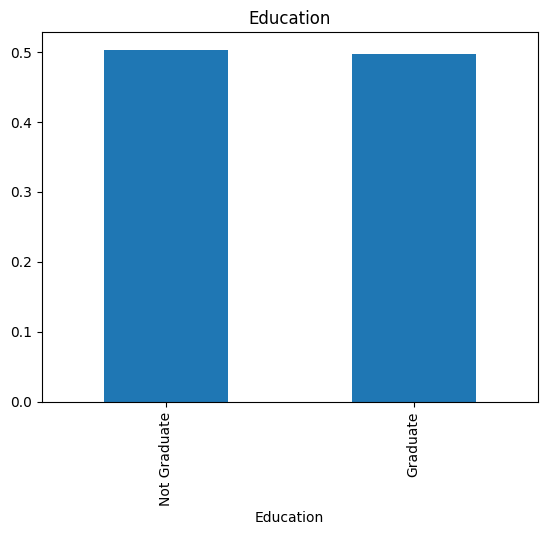

In [19]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

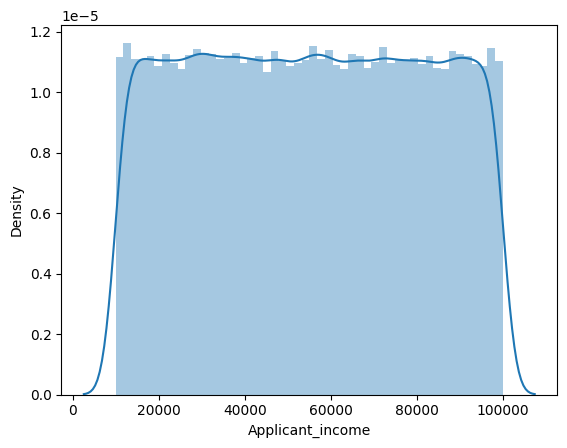

In [20]:
sns.distplot(train['Applicant_income'])
plt.show()

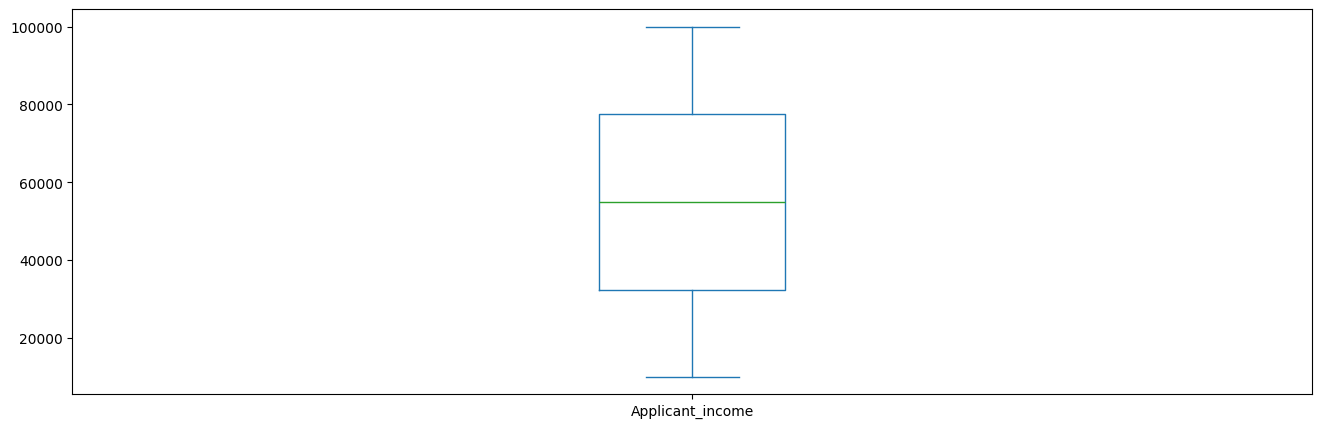

In [21]:
train['Applicant_income'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

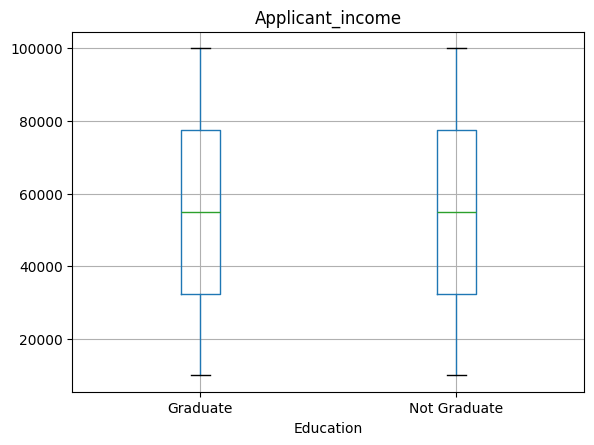

In [22]:
train.boxplot(column='Applicant_income', by = 'Education') 
plt.suptitle('')

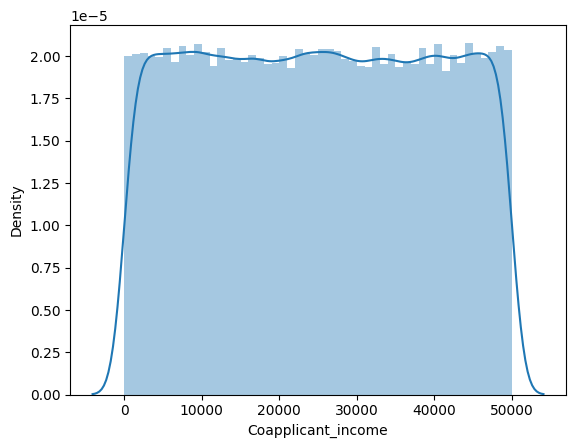

In [23]:
sns.distplot(train['Coapplicant_income'])
plt.show()

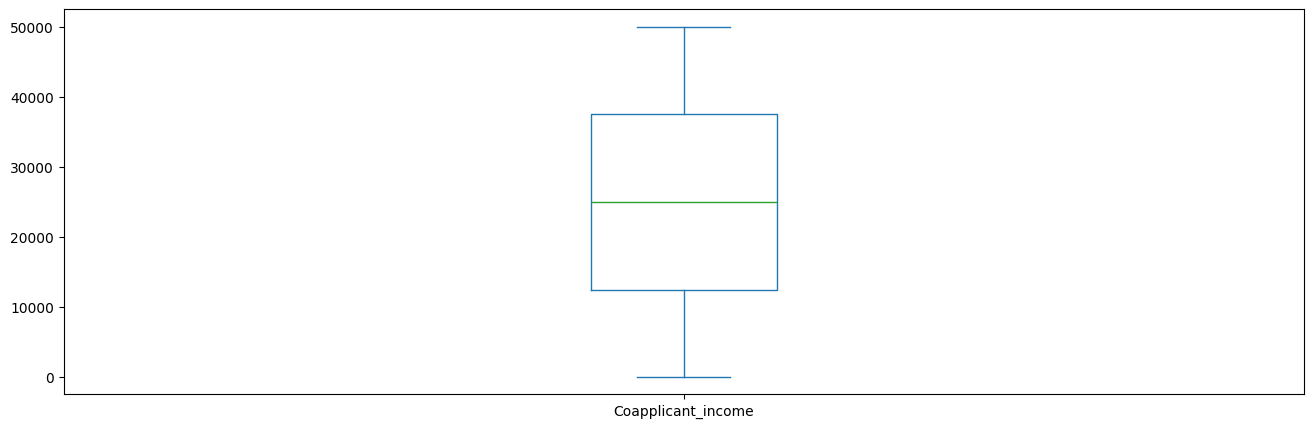

In [24]:
train['Coapplicant_income'].plot.box(figsize=(16,5))
plt.show()

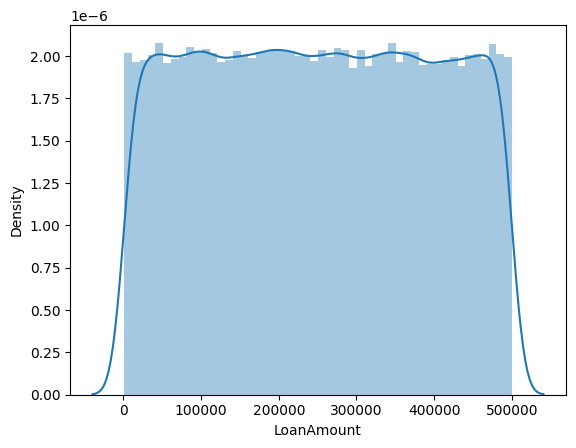

In [25]:
train.notna()
sns.distplot(train['LoanAmount'])
plt.show()

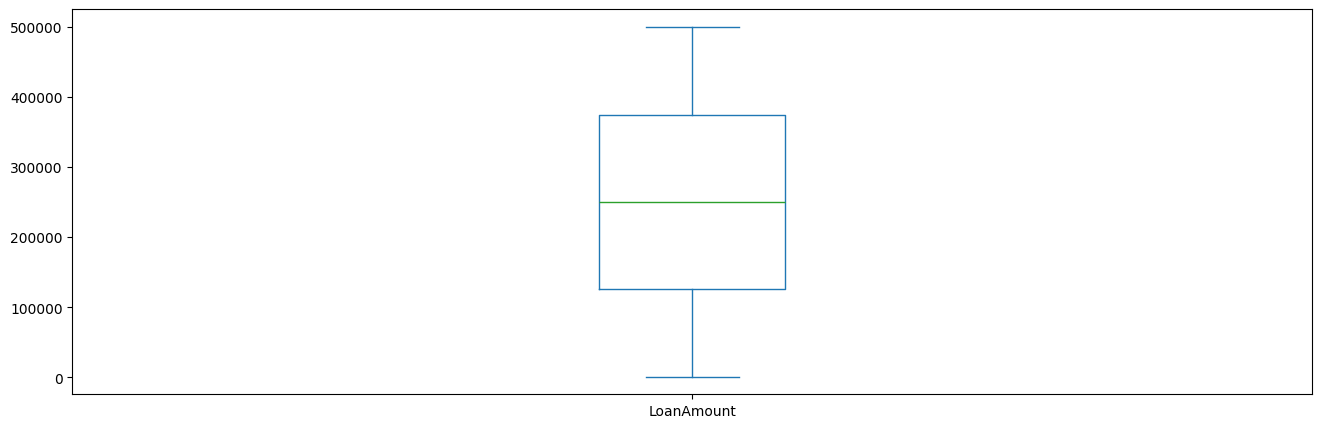

In [26]:
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

1.Applicants with high incomes should have more chances of loan approval.
2.Applicants who have repaid their previous debts should have higher chances of loan approval.
3.Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
4.Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

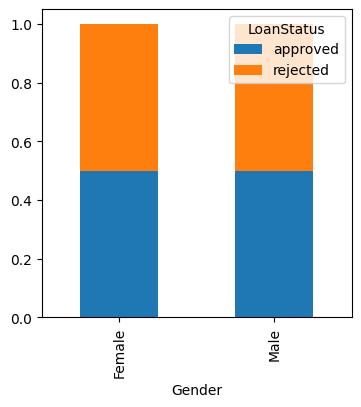

In [27]:
Gender=pd.crosstab(train['Gender'],train['LoanStatus'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

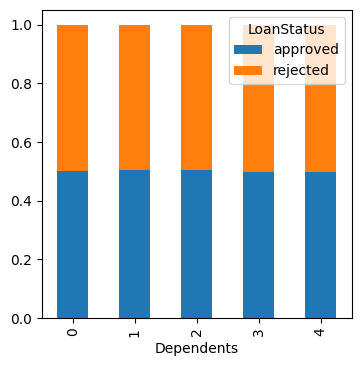

In [28]:
Dependents=pd.crosstab(train['Dependents'],train['LoanStatus'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

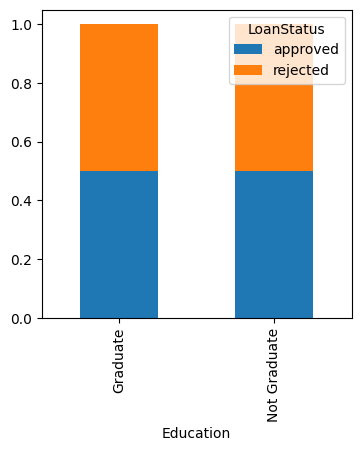

In [29]:
Education=pd.crosstab(train['Education'],train['LoanStatus'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<Axes: xlabel='LoanStatus'>

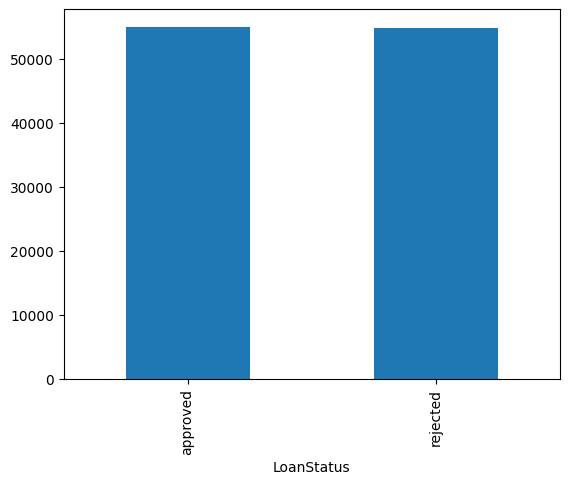

In [30]:
train.groupby('LoanStatus')['Applicant_income'].mean().plot.bar()

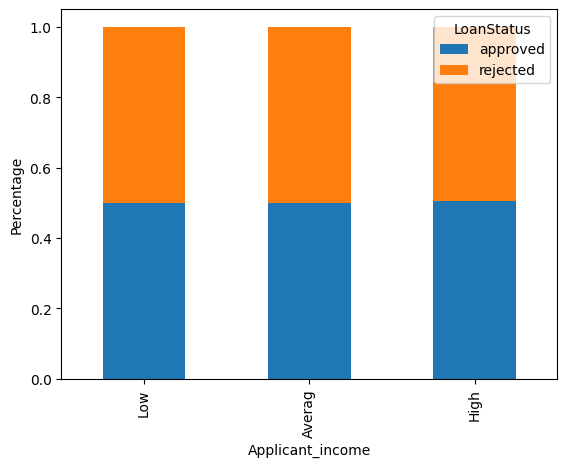

In [31]:
bins=[0,20000,80000,150000,300000]
group=['Low','Averag','High','Very high']
train["Income_bin"]=pd.cut(train['Applicant_income'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['LoanStatus'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Applicant_income')
P=plt.ylabel('Percentage')

In [32]:
columns_to_drop = ['Income_bin', 'Coapplicant_income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income']
existing_columns_to_drop = [col for col in columns_to_drop if col in train.columns]
train = train.drop(existing_columns_to_drop, axis=1)
test['Dependents'].replace('3+', 3,inplace=True)
train['Dependents'].replace('3+', 3, inplace=True)
train['LoanStatus'].replace({'rejected': 0, 'approved': 1}, inplace=True)
print(train.head())
print(test.head())

   CustomerID  Gender  LoanID  Dependents     Education  LoanAmount  LoanTerm  \
0        1001  Female  146212           4  Not Graduate   127483.90  15 years   
1        1002    Male   74753           4      Graduate   165953.19   5 years   
2        1002    Male  108684           2      Graduate   123727.01  15 years   
3        1002    Male  142758           0      Graduate   296676.55  30 years   
5        1006  Female  135000           0  Not Graduate    73687.04  15 years   

   LoanStatus  Applicant_income  Coapplicant_income  
0           0          55764.62             8289.26  
1           1          15233.50            18348.38  
2           0          29829.29            10398.44  
3           0          10389.87            30768.43  
5           0          81317.13            25607.82  
    CustomerID  Gender  LoanID  Dependents     Education  LoanAmount  \
4         1005  Female  161537           4      Graduate   156477.16   
6         1008  Female   76484           2  N

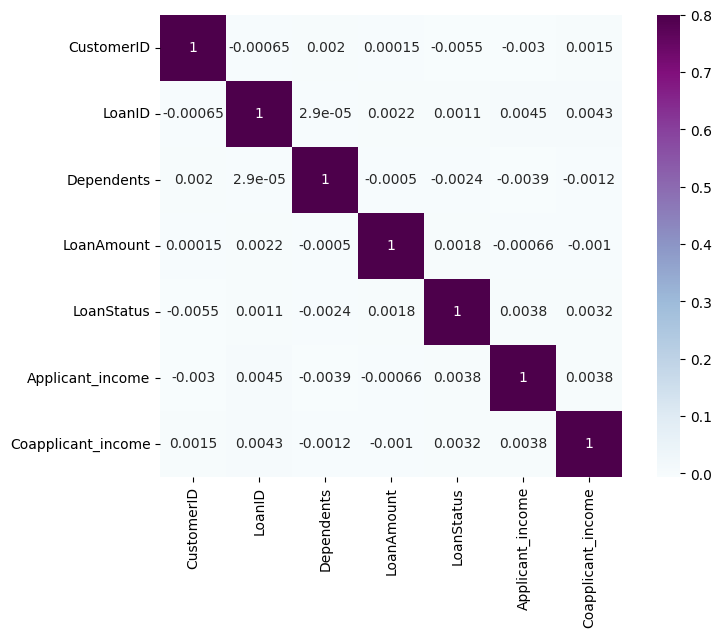

In [33]:
numeric_cols = train.select_dtypes(include=[np.number])

matrix = numeric_cols.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu', annot=True)
plt.show()

In [34]:
train.isnull().sum()

CustomerID            0
Gender                0
LoanID                0
Dependents            0
Education             0
LoanAmount            0
LoanTerm              0
LoanStatus            0
Applicant_income      0
Coapplicant_income    0
dtype: int64

<Axes: >

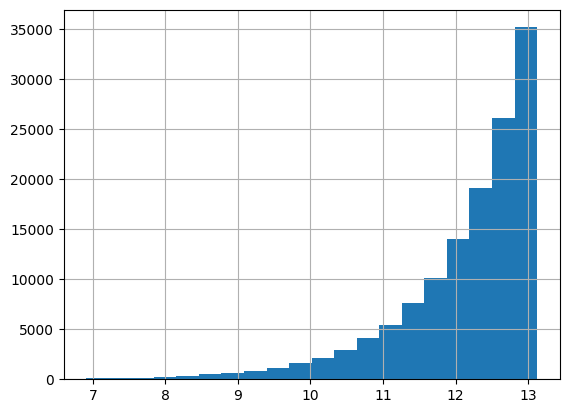

In [35]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

1.Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
2.Logistic regression is an estimation of Logit function. The logit function is simply a log of odds in favor of the event.
3.This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

In [36]:
train=train.drop('LoanID',axis=1)
test=test.drop('LoanID',axis=1)

In [37]:
X = train.drop('LoanStatus', axis=1)
y = train['LoanStatus']
print("Feature set X:")
print(X.head())

print("\nTarget variable y:")
print(y.head())

Feature set X:
   CustomerID  Gender  Dependents     Education  LoanAmount  LoanTerm  \
0        1001  Female           4  Not Graduate   127483.90  15 years   
1        1002    Male           4      Graduate   165953.19   5 years   
2        1002    Male           2      Graduate   123727.01  15 years   
3        1002    Male           0      Graduate   296676.55  30 years   
5        1006  Female           0  Not Graduate    73687.04  15 years   

   Applicant_income  Coapplicant_income  LoanAmount_log  
0          55764.62             8289.26       11.755745  
1          15233.50            18348.38       12.019461  
2          29829.29            10398.44       11.725833  
3          10389.87            30768.43       12.600398  
5          81317.13            25607.82       11.207582  

Target variable y:
0    0
1    1
2    0
3    0
5    0
Name: LoanStatus, dtype: int64


In [38]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [39]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [40]:
X = train.drop('LoanStatus', axis=1)
y = train['LoanStatus']

In [41]:
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression()

In [42]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.5019738000050288

In [43]:
train.head()

,CustomerID,Dependents,LoanAmount,LoanStatus,Applicant_income,Coapplicant_income,LoanAmount_log,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,LoanTerm_10 years,LoanTerm_15 years,LoanTerm_30 years,LoanTerm_5 years
0,1001,4,127483.90,0,55764.62,8289.26,11.755745,True,False,False,True,False,True,False,False
1,1002,4,165953.19,1,15233.50,18348.38,12.019461,False,True,True,False,False,False,False,True
2,1002,2,123727.01,0,29829.29,10398.44,11.725833,False,True,True,False,False,True,False,False
3,1002,0,296676.55,0,10389.87,30768.43,12.600398,False,True,True,False,False,False,True,False
5,1006,0,73687.04,0,81317.13,25607.82,11.207582,True,False,False,True,False,True,False,False


In [44]:
test.head()

,CustomerID,Dependents,LoanAmount,Applicant_income,Coapplicant_income,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,LoanTerm_10 years,LoanTerm_15 years,LoanTerm_30 years,LoanTerm_5 years,LoanStatus_pending
4,1005,4,156477.16,59988.38,39052.13,True,False,True,False,False,False,True,False,True
6,1008,2,332827.71,23118.29,3290.33,True,False,False,True,False,True,False,False,True
15,1016,4,454805.85,15853.44,8430.25,True,False,False,True,False,True,False,False,True
16,1019,1,71241.31,80977.86,36388.69,False,True,True,False,True,False,False,False,True
17,1020,4,66508.60,42367.22,34709.06,True,False,True,False,False,True,False,False,True


In [45]:
test['LoanAmount_log'] = np.log1p(test['LoanAmount'])

In [46]:
test.drop('LoanAmount', axis=1, inplace=True)

In [47]:
test.head()

,CustomerID,Dependents,Applicant_income,Coapplicant_income,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,LoanTerm_10 years,LoanTerm_15 years,LoanTerm_30 years,LoanTerm_5 years,LoanStatus_pending,LoanAmount_log
4,1005,4,59988.38,39052.13,True,False,True,False,False,False,True,False,True,11.960672
6,1008,2,23118.29,3290.33,True,False,False,True,False,True,False,False,True,12.715383
15,1016,4,15853.44,8430.25,True,False,False,True,False,True,False,False,True,13.027628
16,1019,1,80977.86,36388.69,False,True,True,False,True,False,False,False,True,11.173842
17,1020,4,42367.22,34709.06,True,False,True,False,False,True,False,False,True,11.105102


In [48]:
test['LoanStatus'] = test['LoanStatus_pending'].apply(lambda x: 'pending' if x else 'not pending')

test.drop('LoanStatus_pending', axis=1, inplace=True)
test['LoanStatus'] = 'pending'

In [49]:
test.head()

,CustomerID,Dependents,Applicant_income,Coapplicant_income,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,LoanTerm_10 years,LoanTerm_15 years,LoanTerm_30 years,LoanTerm_5 years,LoanAmount_log,LoanStatus
4,1005,4,59988.38,39052.13,True,False,True,False,False,False,True,False,11.960672,pending
6,1008,2,23118.29,3290.33,True,False,False,True,False,True,False,False,12.715383,pending
15,1016,4,15853.44,8430.25,True,False,False,True,False,True,False,False,13.027628,pending
16,1019,1,80977.86,36388.69,False,True,True,False,True,False,False,False,11.173842,pending
17,1020,4,42367.22,34709.06,True,False,True,False,False,True,False,False,11.105102,pending


In [50]:
common_cols = list(set(train.columns) & set(test.columns))
train = train[common_cols]
test = test[common_cols]

In [51]:
test.drop(['LoanStatus'], axis=1, inplace=True)

In [52]:
X_train = pd.get_dummies(train.drop('LoanStatus', axis=1))
X_test = pd.get_dummies(test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [53]:
print(X_train.columns)
print(X_test.columns)

x_train, x_cv, y_train, y_cv = train_test_split(X_train, train['LoanStatus'], test_size=0.3)


model = LogisticRegression()
model.fit(x_train, y_train)

pred_cv = model.predict(x_cv)
print("Cross-validation accuracy:", accuracy_score(y_cv, pred_cv))

Index(['Education_Not Graduate', 'Dependents', 'Gender_Male',
       'Applicant_income', 'LoanTerm_15 years', 'LoanTerm_10 years',
       'Education_Graduate', 'LoanTerm_30 years', 'LoanAmount_log',
       'Coapplicant_income', 'LoanTerm_5 years', 'CustomerID',
       'Gender_Female'],
      dtype='object')
Index(['Education_Not Graduate', 'Dependents', 'Gender_Male',
       'Applicant_income', 'LoanTerm_15 years', 'LoanTerm_10 years',
       'Education_Graduate', 'LoanTerm_30 years', 'LoanAmount_log',
       'Coapplicant_income', 'LoanTerm_5 years', 'CustomerID',
       'Gender_Female'],
      dtype='object')
Cross-validation accuracy: 0.49702044203062534


In [54]:
pred_test = model.predict(X_test)

In [55]:
i = 1
mean_accuracy = 0
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print(f'\n{i} of kfold {kf.n_splits}')
    
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy += score
    print(f'accuracy_score: {score}')
    
    i += 1
print(f'\nMean Validation Accuracy: {mean_accuracy / (i - 1)}')


1 of kfold 5
accuracy_score: 0.4975484649619069

2 of kfold 5
accuracy_score: 0.5037338764426341

3 of kfold 5
accuracy_score: 0.5078826280455608

4 of kfold 5
accuracy_score: 0.5028286942747228

5 of kfold 5
accuracy_score: 0.4972090216489402

Mean Validation Accuracy: 0.501840537074753



1 of kfold 5
accuracy_score: 0.4975484649619069


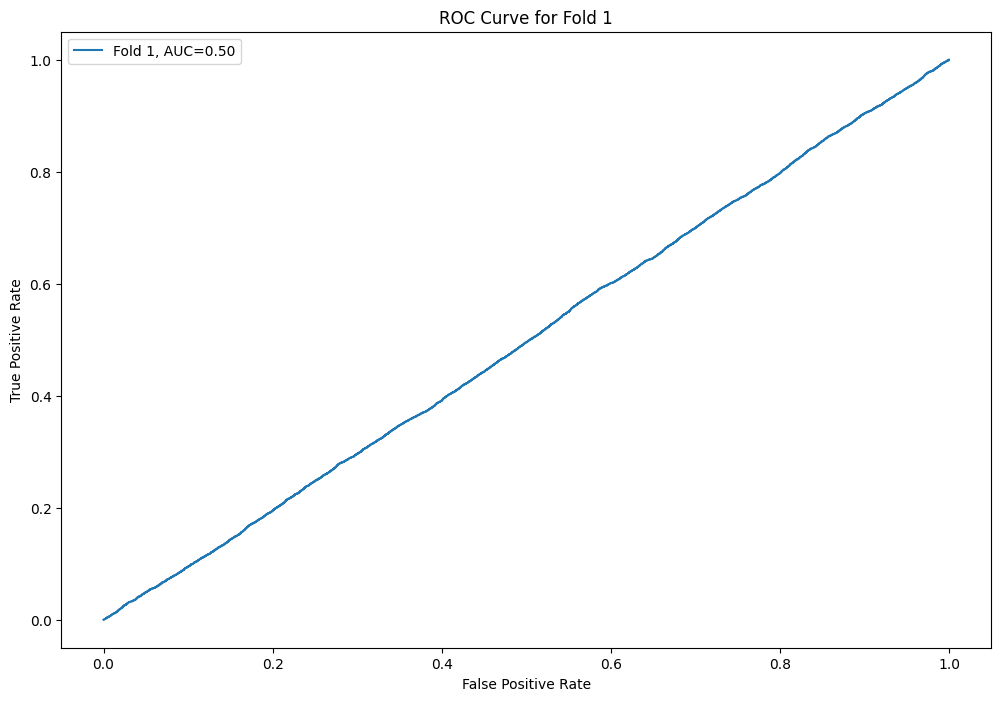


2 of kfold 5
accuracy_score: 0.5037338764426341


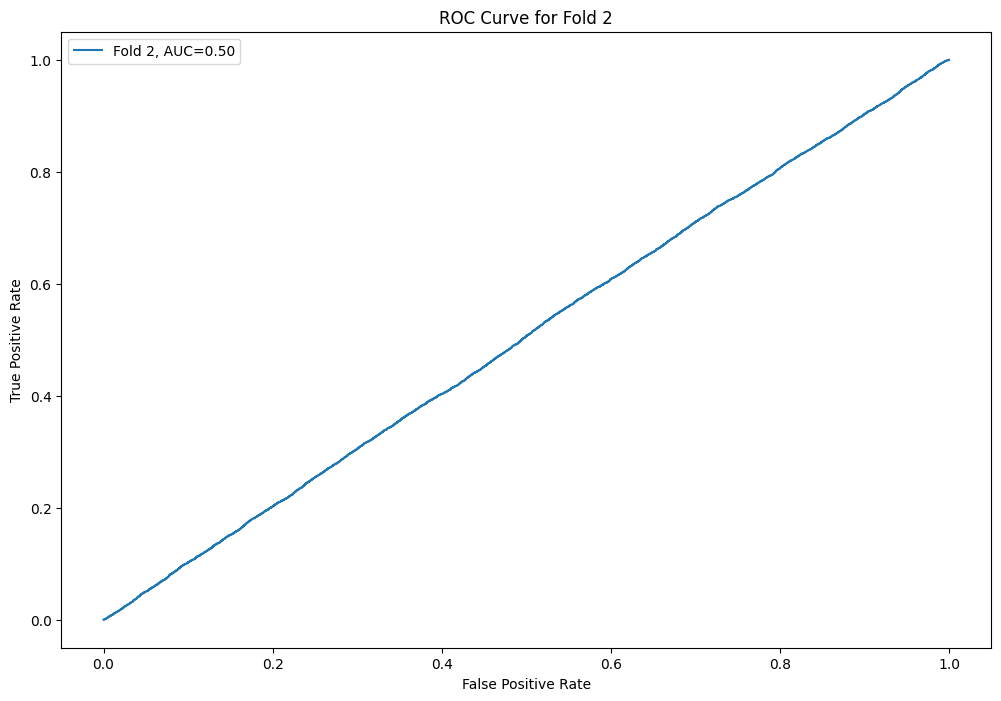


3 of kfold 5
accuracy_score: 0.5078826280455608


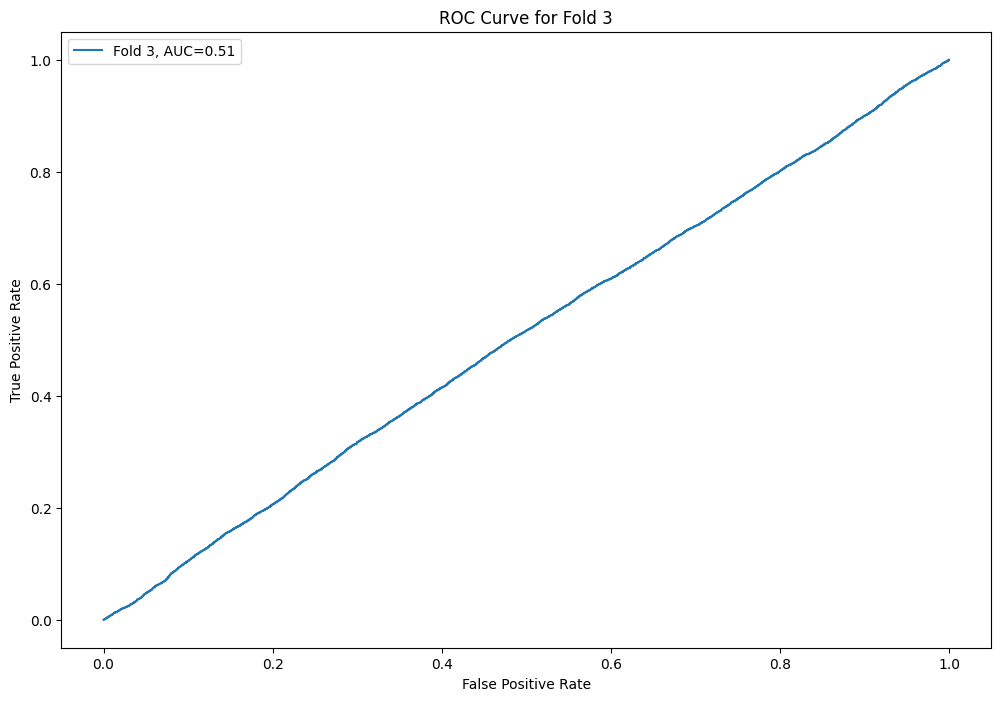


4 of kfold 5
accuracy_score: 0.5028286942747228


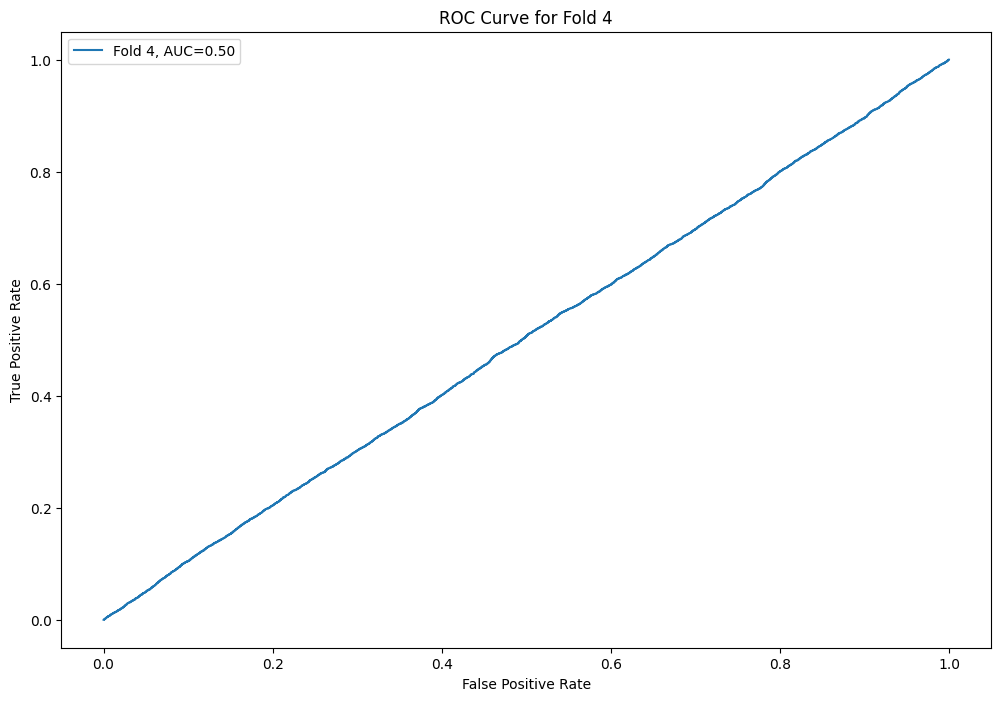


5 of kfold 5
accuracy_score: 0.4972090216489402


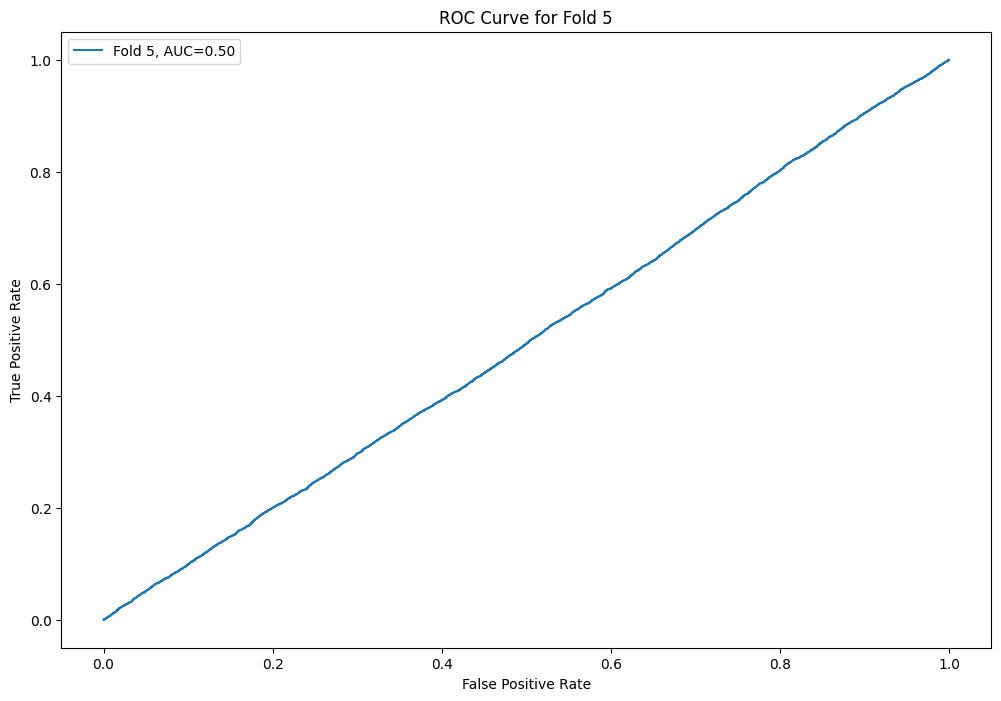


Mean Validation Accuracy: 0.501840537074753
Mean AUC: 0.5014822600706677


In [56]:
i = 1
mean_accuracy = 0
all_fpr = []
all_tpr = []
mean_auc = 0

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print(f'\n{i} of kfold {kf.n_splits}')
    
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    pred_prob = model.predict_proba(xvl)[:, 1]
    score = accuracy_score(yvl, pred_test)
    mean_accuracy += score
    print(f'accuracy_score: {score}')
    
    fpr, tpr, _ = roc_curve(yvl, pred_prob)
    auc = roc_auc_score(yvl, pred_prob)
    mean_auc += auc
    
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label=f'Fold {i}, AUC={auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.title(f'ROC Curve for Fold {i}')
    plt.show()
    
    i += 1

print(f'\nMean Validation Accuracy: {mean_accuracy / (i - 1)}')
print(f'Mean AUC: {mean_auc / (i - 1)}')

In [57]:
train['Total_Income']=train['Applicant_income']+train['Coapplicant_income']
test['Total_Income']=test['Applicant_income']+test['Coapplicant_income']

<Axes: xlabel='Total_Income', ylabel='Density'>

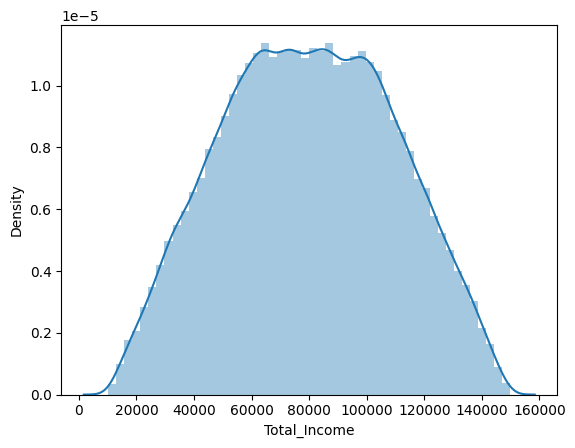

In [58]:
sns.distplot(train['Total_Income'])

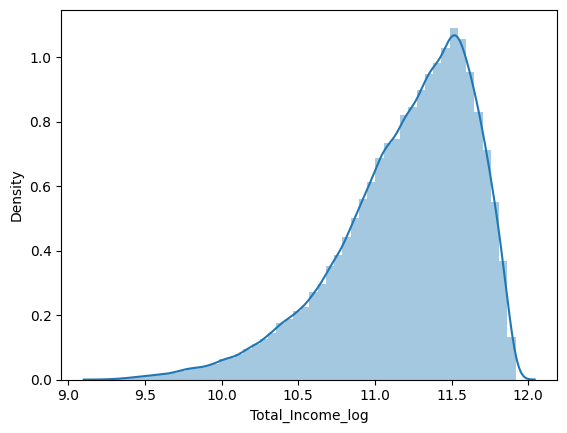

In [59]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])


In [60]:
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

In [70]:
i = 1
mean = 0

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl, pred_test)
    mean += score
    
    print('accuracy_score', score)
    i += 1

print('\nMean Validation Accuracy', mean / (i - 1))


1 of kfold 5
accuracy_score 0.5013577732518669

2 of kfold 5
accuracy_score 0.4949837821528249

3 of kfold 5
accuracy_score 0.5027532624273968

4 of kfold 5
accuracy_score 0.49675643056498453

5 of kfold 5
accuracy_score 0.49611525986271404

Mean Validation Accuracy 0.49839330165195744


In [72]:
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

i = 1
mean = 0

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean += score
    print('accuracy_score', score)
    
    i += 1

print('\nMean Validation Accuracy', mean / (i - 1))


1 of kfold 5
accuracy_score 0.49339971335898014

2 of kfold 5
accuracy_score 0.5009051821679112

3 of kfold 5
accuracy_score 0.5022629554197783

4 of kfold 5
accuracy_score 0.4979633401221996

5 of kfold 5
accuracy_score 0.49596439616806215

Mean Validation Accuracy 0.49809911744738633


In [78]:
paramgrid = {
    'max_depth': list(range(1, 20, 2)),
    'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_

# Print best parameters
print("Best parameters found:", grid_search.best_params_)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Initialize variables for cross-validation
i = 1
mean = 0

# Cross-validation loop
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    # Train the RandomForest model with the best parameters
    model = best_rf
    model.fit(xtr, ytr)
    
    # Make predictions and calculate accuracy
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean += score
    print('accuracy_score', score)
    
    i += 1

# Print mean validation accuracy
print('\nMean Validation Accuracy', mean / (i - 1))